# Banking Customer Churn Prediction

### 1. Dataset

This dataset contains information about bank customers and their churn status, which indicates whether they have exited the bank or not. It comprises information on 10,000 bank customers hailing from three distinct countries: Spain, Germany, and France. Among these customers, 2037 have exited the bank, providing valuable insights into churn dynamics across multiple geographical regions.

#### 1.1. Machine learning problem

Exploring and understanding the underlying patterns and behaviors that contribute to customer churn is essential. By analyzing various factors such as demographics, account activity, transaction history, customer service interactions, and product usage, we can gain insights into the drivers of churn.

Through this comprehensive analysis, we aim to develop predictive models that accurately identify customers at risk of churning, enabling proactive retention strategies and ultimately improving customer retention rates for the bank.

To accomplish this objective, we will leverage supervised learning model, which learn patterns from labeled data to make predictions. This model will be trained on historical data where the churn status of customers is known, allowing them to discern patterns and relationships between various features and churn outcomes.

#### 1.2. Database features

| Attribute               | Description                                                          |
| ----------------------- | -------------------------------------------------------------------- |
| **A - RowNumber**       | The sequential number assigned to each row in the dataset.           |
| **B - CustomerId**      | A unique identifier for each customer.                               |
| **C - Surname**         | The surname of the customer.                                         |
| **D - CreditScore**     | The credit score of the customer.                                    |
| **E - Geography**       | The geographical location of the customer.                           |
| **F - Gender**          | The gender of the customer.                                          |
| **G - Age**             | The age of the customer.                                             |
| **H - Tenure**          | The number of years the customer has been with the bank.             |
| **I - Balance**         | The account balance of the customer.                                 |
| **J - NumOfProducts**   | The number of bank products the customer has.                        |
| **K - HasCrCard**       | Indicates whether the customer has a credit card (binary: yes/no).   |
| **L - IsActiveMember**  | Indicates whether the customer is an active member (binary: yes/no). |
| **M - EstimatedSalary** | The estimated salary of the customer.                                |
| **N - Exited**          | Indicates whether the customer has exited the bank (binary: yes/no). |


<br>

------

### 2. Import libraries


In [91]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay, f1_score, make_scorer

------

### 3. Data analysis


Before proceeding further, we will analyze the data to gain a better understanding of its characteristics. In this section, we will explore each feature in detail and examine its relationship with the churn status.


In [92]:
# Read the dataset
dataframe = pd.read_csv('Churn_Modelling.csv')

dataframe.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### 3.1. Credit score

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


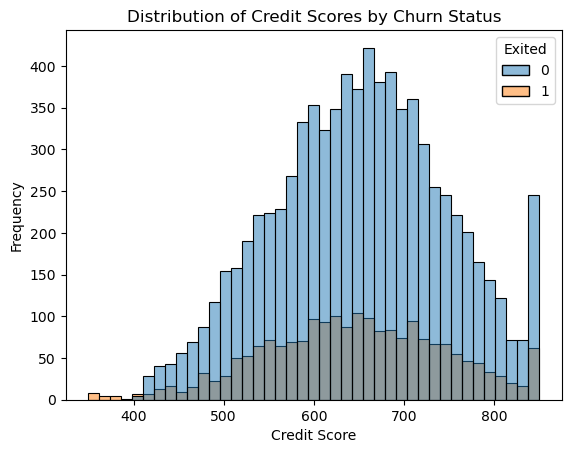

In [93]:
# Plot the distribution of credit scores by churn status
sb.histplot(data=dataframe, x='CreditScore', hue='Exited')
plt.title('Distribution of Credit Scores by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

**Observations:**

The credit score follows a normal distribution along the dataset, which suggests that it is evenly distributed across the range of values, without any significant skewness or outliers.

#### 3.2. Geography


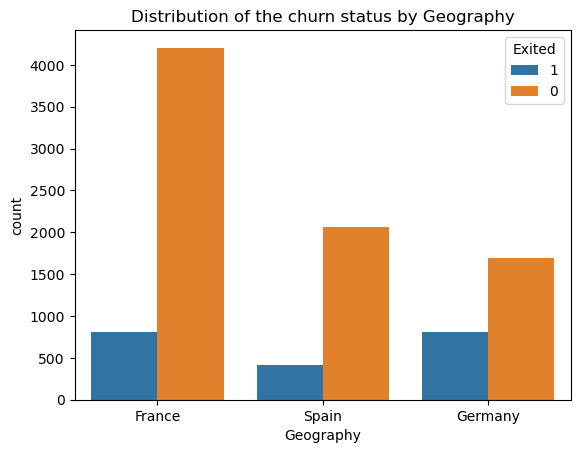

Geography,France,Germany,Spain
Exited,,,
0,83.845233,67.556796,83.326605
1,16.154767,32.443204,16.673395


In [94]:
dataframe['Exited'] = dataframe['Exited'].astype(str)

# Plot the distribution of the churn status by geography
sb.countplot(x='Geography', hue='Exited', data=dataframe)
plt.title('Distribution of the churn status by Geography')
plt.show()

# Plot the distribution of the churn status in percentage by geography
pd.crosstab(dataframe['Exited'], dataframe['Geography'], normalize = 'columns')* 100

**Observations:**

The distribution of customers across different geographic locations reveals that approximately 50% of the customers belong to France, while 25% each belong to Germany and Spain. 

Despite the expectation that customer churn should not be influenced by geographic location, the data shows that around 32% of customers from Germany have churned. This suggests that there may be underlying factors specific to Germany that contribute to a higher churn rate among its customers.

#### 3.3. Gender


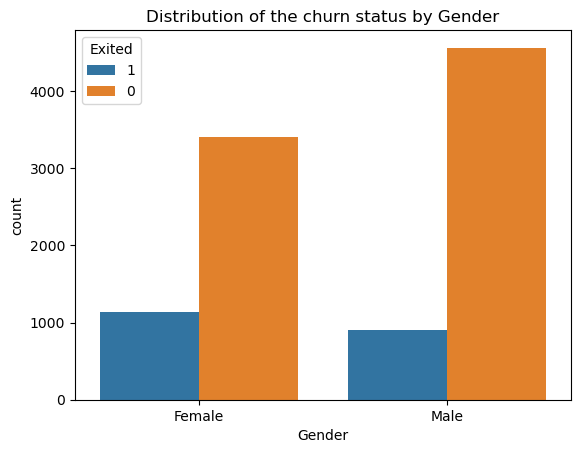

Gender,Female,Male
Exited,,
0,74.928461,83.544072
1,25.071539,16.455928


In [95]:
# Plot the distribution of the churn status by gender
sb.countplot(x='Gender', hue='Exited', data=dataframe)
plt.title('Distribution of the churn status by Gender')
plt.show()

# Plot the distribution of the churn status in percentage by gender
pd.crosstab(dataframe['Exited'], dataframe['Gender'], normalize = 'columns')* 100

**Observations:**

Based on the data, it appears that females have a higher churn rate compared to males, with a churn rate of 25%. This suggests that gender may be a factor influencing customer churn, with females being more likely to churn than males. 

#### 3.4. Age


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


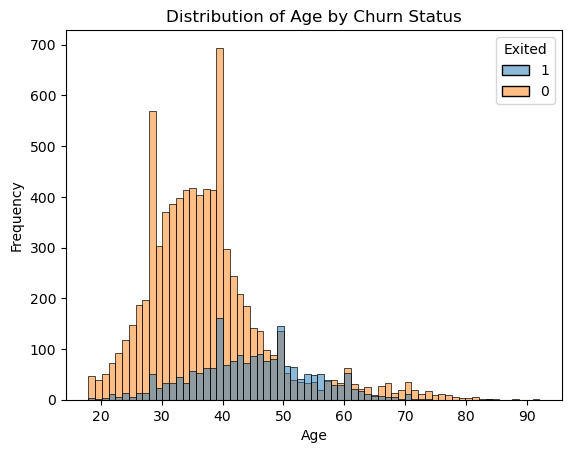

In [96]:
sb.histplot(data=dataframe, x='Age', hue='Exited')
plt.title('Distribution of Age by Churn Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Observations:**

The distribution of ages within the dataset appears to be slightly right-skewed, indicating that there are relatively fewer older customers compared to younger ones.

Additionally, there seems to be a noticeable trend in churn status with respect to age. Specifically, there is a tendency for the churn rate to increase after the age of 35. This suggests that older customers, particularly those over 35 years old, may be more likely to churn compared to younger customers. 

#### 3.5. Tenure


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


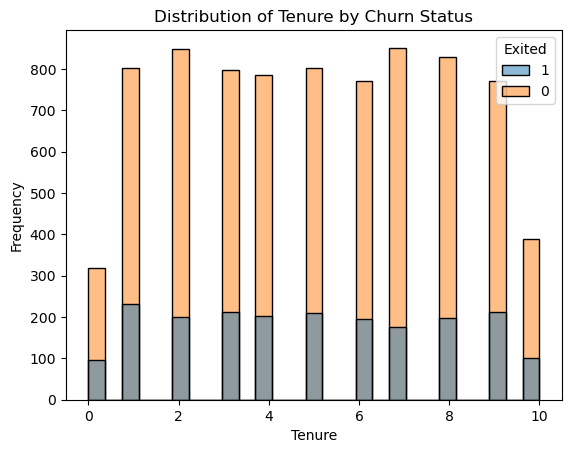

In [97]:
sb.histplot(data=dataframe, x='Tenure', hue='Exited')
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

**Observations:**

The distribution of tenure exhibits an irregular form, indicating that there isn't a clear relationship between tenure (the length of time a customer has been with the bank) and customer churn. This suggests that customer churn may not be strongly influenced by the duration of their tenure with the bank.

#### 3.6. Balance


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


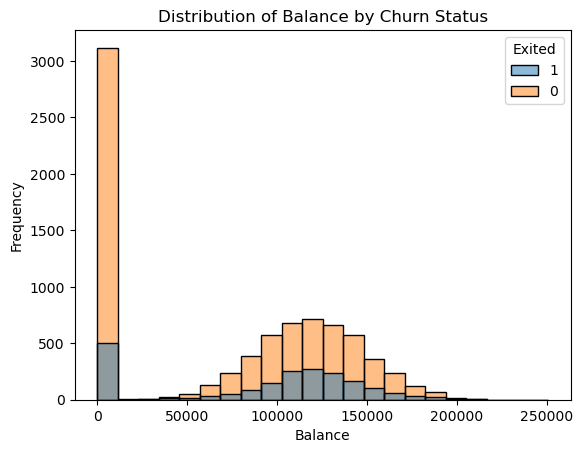

In [98]:
sb.histplot(data=dataframe, x='Balance', hue='Exited')
plt.title('Distribution of Balance by Churn Status')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

**Observations:**

The balance variable follows a normal distribution for values greater than 0, with values ranging between 50,000 and 200,000. 

#### 3.7. Number of products

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


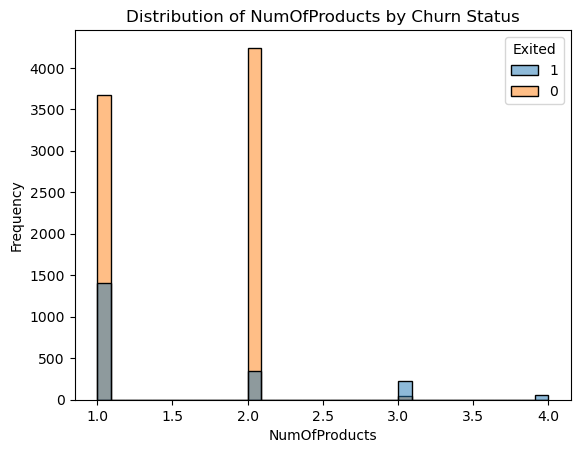

In [99]:
sb.histplot(data=dataframe, x='NumOfProducts', hue='Exited')
plt.title('Distribution of NumOfProducts by Churn Status')
plt.xlabel('NumOfProducts')
plt.ylabel('Frequency')
plt.show()

**Observations:**

The analysis indicates a significant relationship between the number of products and the customer churn rate. Specifically, customers with only one product have the highest churn rate. 

This suggests that the number of products a customer has may influence their likelihood of churning, with customers holding fewer products being more prone to churn.

#### 3.8. Credit card

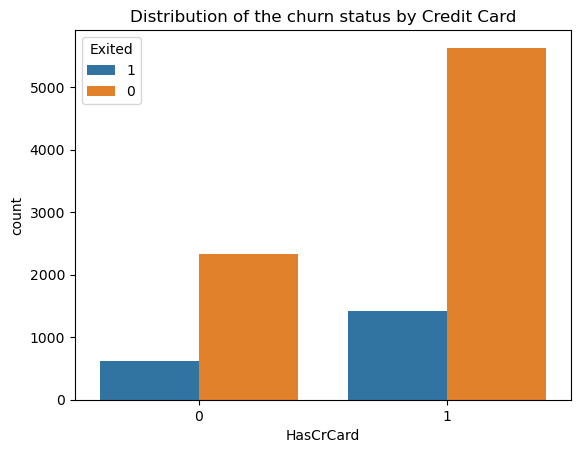

HasCrCard,0,1
Exited,,
0,79.185059,79.815734
1,20.814941,20.184266


In [100]:
sb.countplot(x='HasCrCard', hue='Exited', data=dataframe)
plt.title('Distribution of the churn status by Credit Card')
plt.show()

pd.crosstab(dataframe['Exited'], dataframe['HasCrCard'], normalize = 'columns')* 100

**Observations:**

The analysis reveals that the percentage of churn customers is similar regardless of whether they have a credit card. 

This suggests that having a credit card or not has no discernible effect on the customer churn status.

#### 3.9. Active member

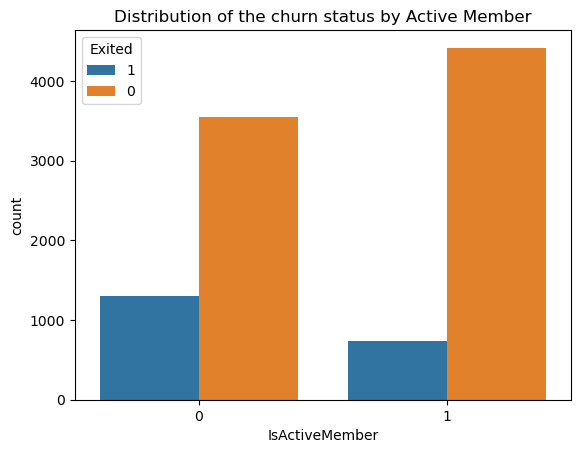

IsActiveMember,0,1
Exited,,
0,73.149103,85.730926
1,26.850897,14.269074


In [101]:
sb.countplot(x='IsActiveMember', hue='Exited', data=dataframe)
plt.title('Distribution of the churn status by Active Member')
plt.show()

pd.crosstab(dataframe['Exited'], dataframe['IsActiveMember'], normalize = 'columns')* 100

**Observations:**

Non-active members are more likely to churn, with a churn rate of 26.85%, compared to active members, who have a churn rate of 14.26%. This indicates that the level of activity of a customer within the bank's services may influence their likelihood of churning. 

#### 3.10. Estimated salary

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


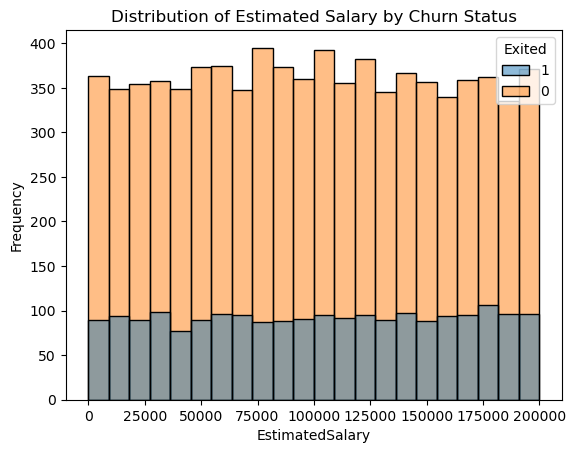

In [102]:
sb.histplot(data=dataframe, x='EstimatedSalary', hue='Exited')
plt.title('Distribution of Estimated Salary by Churn Status')
plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.show()

**Observations:**

The Estimated salary variable follows a normal distribution, indicating that salaries are evenly distributed across the dataset. However, despite this distribution, the estimated salary does not appear to have a significant effect on customer churn status.

It's worth noting that the salary varies from 0 to 200,000, suggesting that there might be some noise in the dataset. This wide range of salary values could potentially introduce variability into the analysis and make it more challenging to identify clear patterns or relationships between salary and churn status. 

---

### 4. Data preprocessing

#### 4.1. Dimensionality reduction and Feature subset selection


In [103]:
dataframe.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

#### 4.2. Label encoding and binarization

In [104]:
dataframe['Gender'] = (dataframe['Gender'] == "Male").astype(int)

countries = {'France': 0, 'Spain': 1, 'Germany': 2}
dataframe['Geography'] = dataframe['Geography'].map(countries)

#### 4.3. Attribute transformation 

In [105]:
dataframe = dataframe[dataframe['EstimatedSalary'] >= 1000]

country_salaries = {'France': 1540 * 12, 'Spain': 1050 * 12, 'Germany': 1580 * 12}
dataframe.loc[dataframe['EstimatedSalary'] < dataframe['Geography'].map(country_salaries), 'EstimatedSalary'] *= 12


#### 4.4. Sampling




<Axes: xlabel='Exited', ylabel='count'>

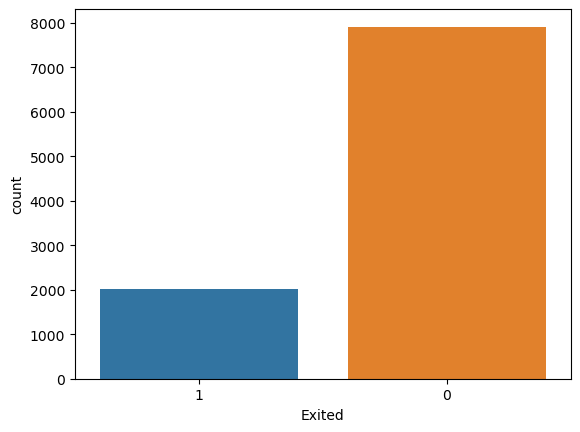

In [106]:
sb.countplot(x='Exited', data=dataframe)

Note there is an uneven distribution ....



<Axes: xlabel='Exited', ylabel='count'>

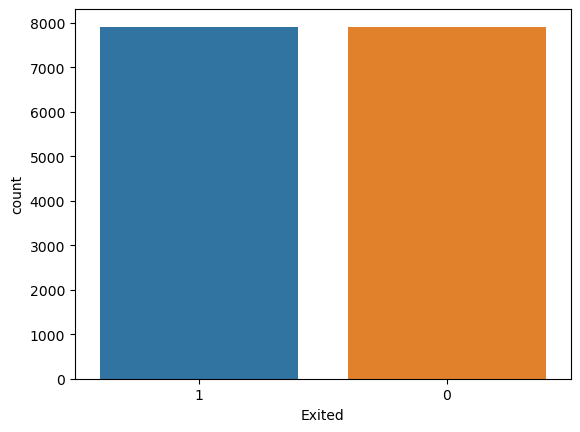

In [107]:
smt = SMOTE(random_state=5)
X = dataframe.drop('Exited', axis = 1)
y = dataframe['Exited']
X, y = smt.fit_resample(X, y)

imbalanced = dataframe
balancedDataframe = pd.concat([X, y], axis=1)

dataframe = pd.concat([X, y], axis=1)
sb.countplot(x='Exited', data=dataframe)

#### 4.5. Correlation matrix

Firstly, we start by computing the correlation matrix as a fundamental step in exploring the relationships between variables within our dataset. This matrix provides insight into how each variable is related to every other variable, helping us understand the direction and strength of these relationships.

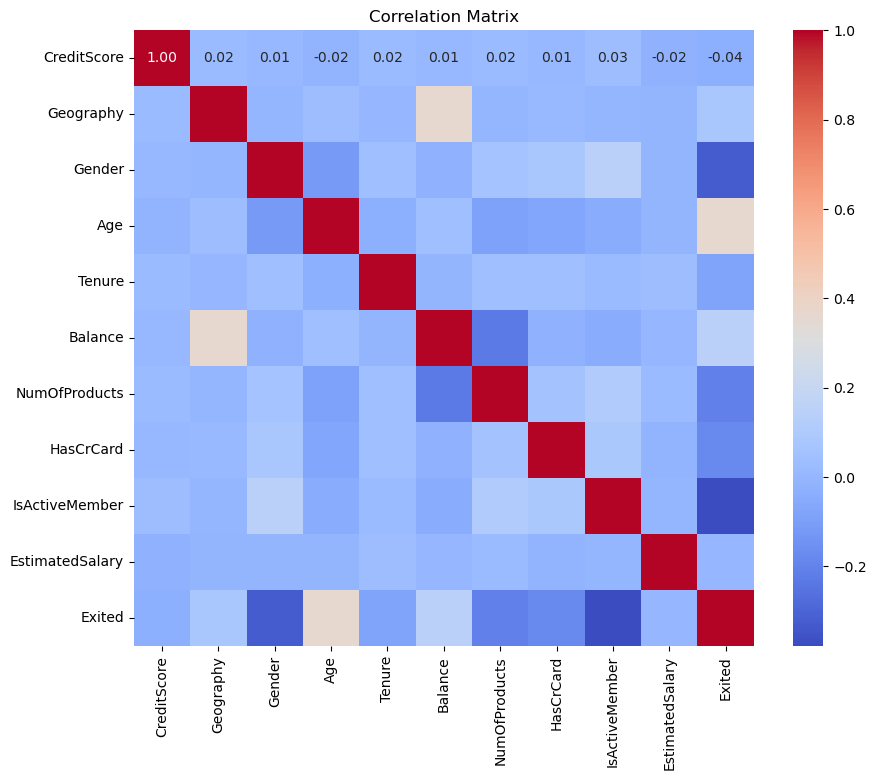

In [108]:
correlation_matrix = dataframe.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

------

### 5. Model training

In [109]:
all_inputs = dataframe[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']].values
all_labels = dataframe['Exited'].values

(training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

#### 5.1. Decision tree

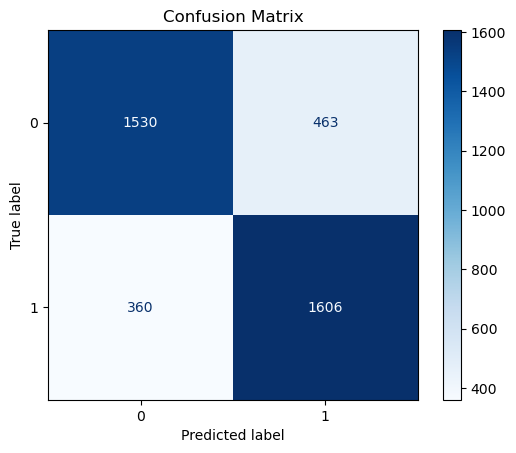

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1993
           1       0.78      0.82      0.80      1966

    accuracy                           0.79      3959
   macro avg       0.79      0.79      0.79      3959
weighted avg       0.79      0.79      0.79      3959



In [110]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(training_inputs, training_classes)
decision_tree_classifier.score(testing_inputs, testing_classes)

predictions = decision_tree_classifier.predict(testing_inputs)

cm = confusion_matrix(testing_classes, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print(classification_report(testing_classes, predictions))

#### 5.2. K-Nearest Neighbors



In [111]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(training_inputs, training_classes)
knn_classifier.score(testing_inputs, testing_classes)

predictions = knn_classifier.predict(testing_inputs)
print(confusion_matrix(testing_classes, predictions))
print(classification_report(testing_classes, predictions))

[[1192  801]
 [ 451 1515]]
              precision    recall  f1-score   support

           0       0.73      0.60      0.66      1993
           1       0.65      0.77      0.71      1966

    accuracy                           0.68      3959
   macro avg       0.69      0.68      0.68      3959
weighted avg       0.69      0.68      0.68      3959



#### 5.3. Support Vector Machines (SVM)

In [112]:
svc = SVC()
svc.fit(training_inputs, training_classes)

predictions = svc.predict(testing_inputs)
print(confusion_matrix(testing_classes, predictions))
print(classification_report(testing_classes, predictions))

[[ 786 1207]
 [ 505 1461]]
              precision    recall  f1-score   support

           0       0.61      0.39      0.48      1993
           1       0.55      0.74      0.63      1966

    accuracy                           0.57      3959
   macro avg       0.58      0.57      0.55      3959
weighted avg       0.58      0.57      0.55      3959



#### 5.4. Naive Bayes

In [113]:
gnb = GaussianNB()
gnb.fit(training_inputs, training_classes)

predictions = gnb.predict(testing_inputs)
print(confusion_matrix(testing_classes, predictions))
print(classification_report(testing_classes, predictions))


[[1394  599]
 [ 491 1475]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1993
           1       0.71      0.75      0.73      1966

    accuracy                           0.72      3959
   macro avg       0.73      0.72      0.72      3959
weighted avg       0.73      0.72      0.72      3959



#### 5.5. Neural Networks

In [114]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
mlp.fit(training_inputs, training_classes)

predictions = mlp.predict(testing_inputs)
print(confusion_matrix(testing_classes, predictions))
print(classification_report(testing_classes, predictions))

[[1060  933]
 [ 846 1120]]
              precision    recall  f1-score   support

           0       0.56      0.53      0.54      1993
           1       0.55      0.57      0.56      1966

    accuracy                           0.55      3959
   macro avg       0.55      0.55      0.55      3959
weighted avg       0.55      0.55      0.55      3959



----

#### 6. Variances ???

#### 6.1. Training and test set sizes

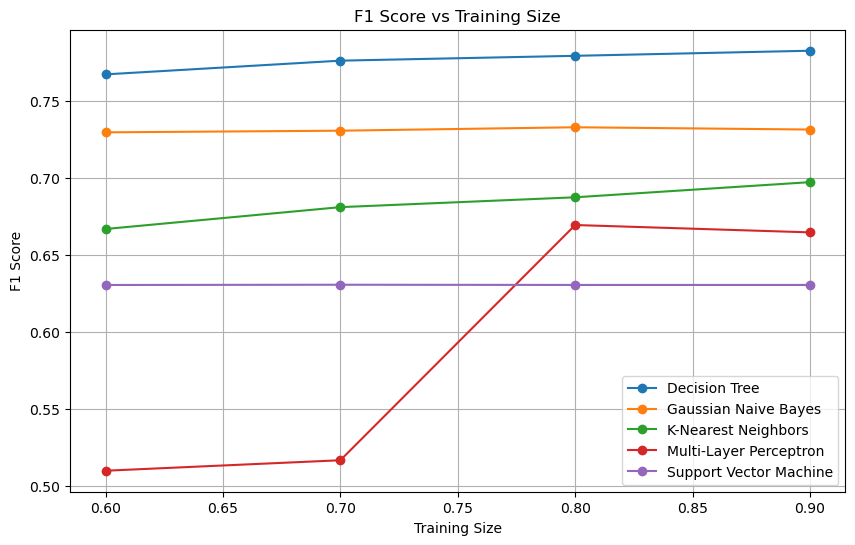

In [115]:
 # code to manipulate the training and test sizes
training_sizes = [0.6, 0.7, 0.8, 0.9]
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Multi-Layer Perceptron', MLPClassifier(random_state=1))
]
results = []

for clf_name, clf in classifiers:
    for size in training_sizes:
            # divido o conjunto
            (partial_training_inputs, _, partial_training_classes, _) = train_test_split(training_inputs, training_classes, train_size=size, random_state=1)
            # treino o classificador
            clf.fit(partial_training_inputs, partial_training_classes)
            # faço previsões
            predictions = clf.predict(testing_inputs)
            # calculo o f1
            f1 = f1_score(testing_classes, predictions, pos_label='1')
            
            results.append((size, clf_name, f1))
results_df = pd.DataFrame(results, columns=['Training Size', 'Classifier', 'F1 Score'])
plt.figure(figsize=(10, 6))
for clf_name, group in results_df.groupby('Classifier'):
    plt.plot(group['Training Size'], group['F1 Score'], marker='o', label=clf_name)
plt.title('F1 Score vs Training Size')
plt.xlabel('Training Size')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

To conduct tests with different training set sizes, we defined values between 60% and 90% (anything smaller wouldn't make much sense). As expected, we noticed that the larger the training set, the better the F1-Score. Although the differences were not very noticeable overall, in the Multi-Layer Perceptron classifier, from 70% onwards, there was a significant increase. This could be attributed to various factors, such as the model's ability to learn more complex patterns, the amount of data available for training, and the model's generalization capacity. Additionally, we had to use the following configuration: ('Multi-Layer Perceptron', MLPClassifier(random_state=1)) to ensure consistent results.

#### 6.2. # K-fold cross validation

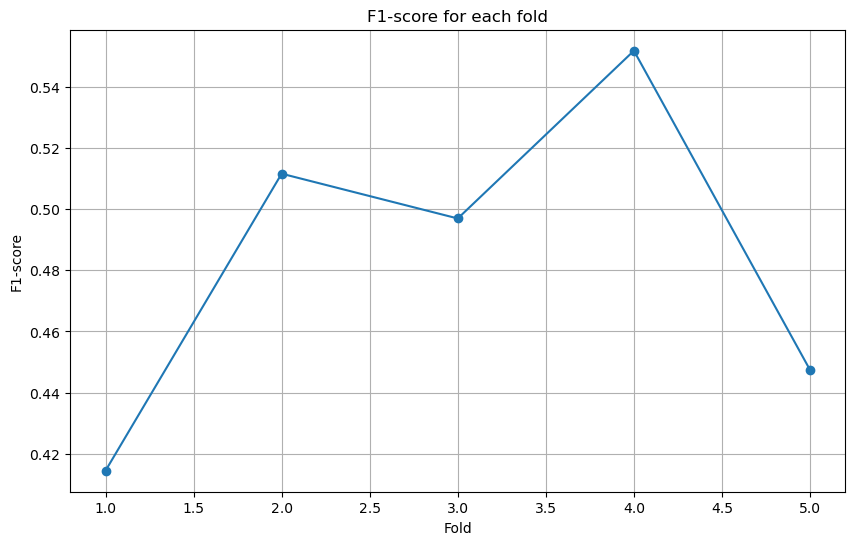

In [140]:
# K-fold cross validation
# aplicar este algoritmo 

import numpy as np

clf = MLPClassifier()
f1_scorer = make_scorer(f1_score, pos_label='1')

f1_scores_per_fold = []

# faço 10 vezes para ter uma média
for _ in range(10):
    # K-fold com K = 5
    cv_scores = cross_val_score(clf, all_inputs, all_labels, cv=5, scoring=f1_scorer)
    f1_scores_per_fold.append(cv_scores)


f1_scores_per_fold = np.array(f1_scores_per_fold)
mean_f1_score_per_fold = f1_scores_per_fold.mean(axis=0)
mean_mean_f1_score = mean_f1_score_per_fold.mean()

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 6), mean_f1_score_per_fold, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('F1-score')
plt.title('F1-score for each fold')
plt.grid(True)
plt.show()

#### 6.3. Balanced vs Imbalanced dataset

In [117]:
# code to compare balanced and unbalanced data
# correr todos os algoritmos no imbalanced e fazer uma tabela com os de balanced e os de imbalanced
# ...

#### 6.4. Decision tree with different criterias

In [118]:
# code....

#### 6.5. K-nearest neighbors proximity metric

#### 6.6. SVM kernel function

#### 6.7. Neural networks with different hidden layers and neurons

In [119]:
# code ...

#### 6.8. Attribute manipulations

In [120]:
# code...

-----

### 7. Results and conclusions